In [1]:
%pylab inline

import pandas as pd
import math
import numpy as np
from random import sample
import matplotlib.pyplot as plt
import csv
import glob
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('s2_10_val01_summaryStats_for_boxPlots.csv',header=0)

ndf2 = df[['pr_h99', 'ob_h99','pr_h95', 'ob_h95', 'pr_h75', 'ob_h75', 'pr_h25', 'ob_h25','pr_hmc', 'ob_hmc','pr_hsd',
           'ob_hsd', 'pr_hcv', 'ob_hcv']]

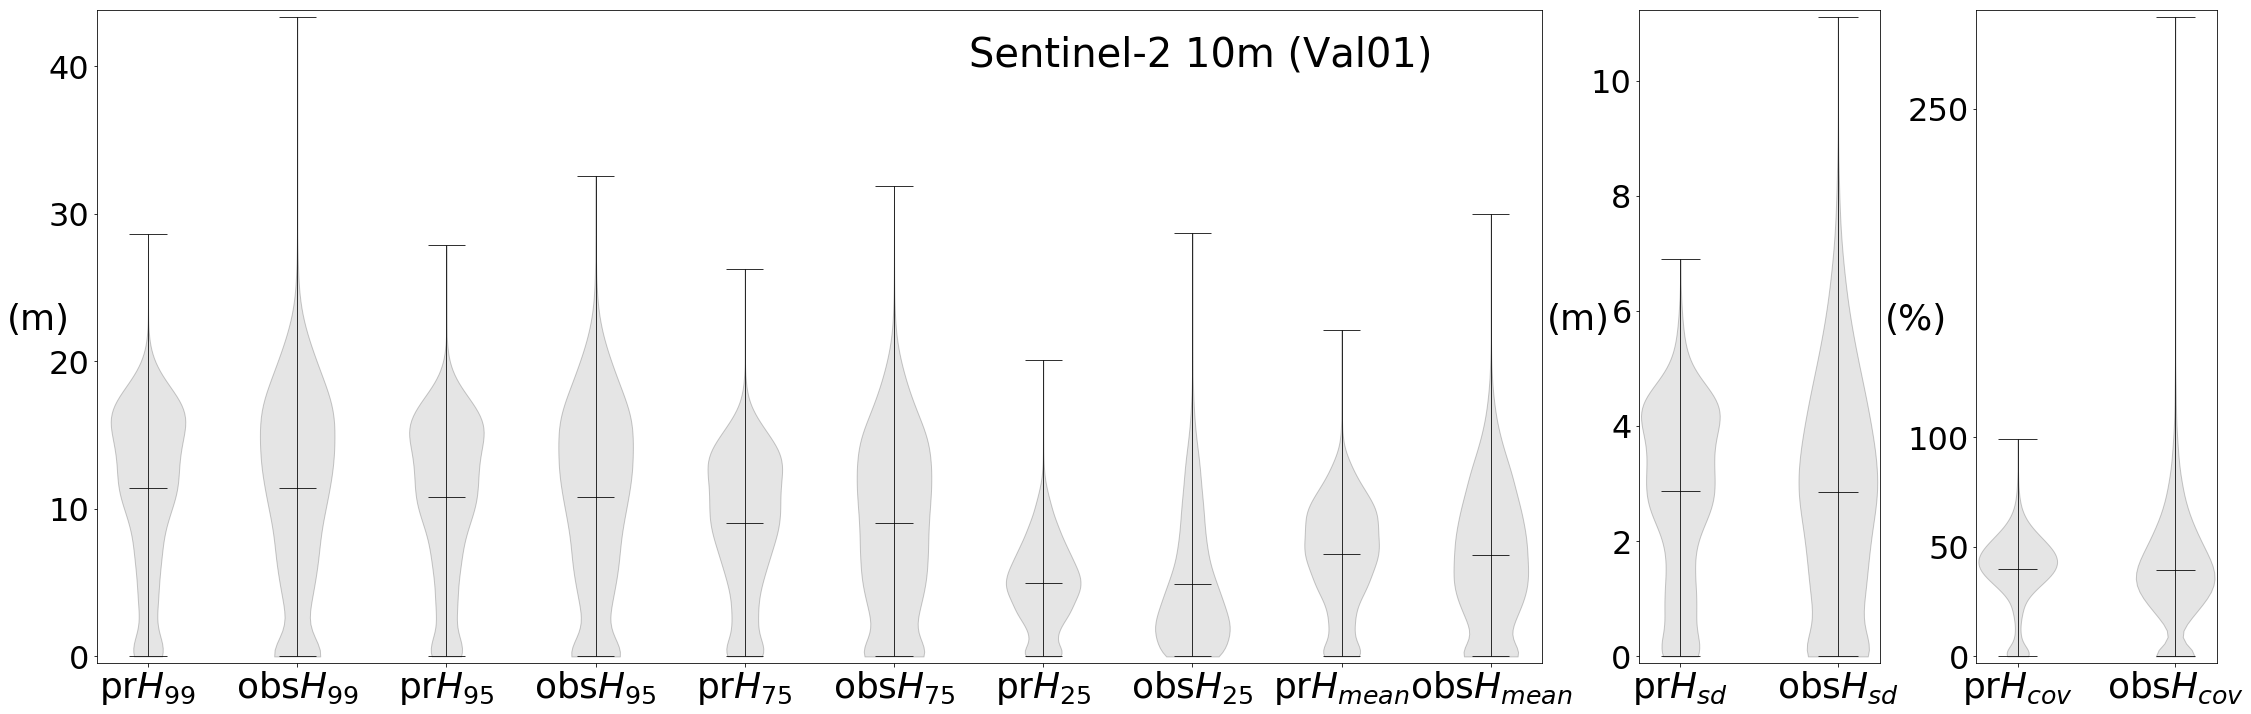

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import gridspec

# Create violin plot objects:
data2 = ndf2[['pr_h99', 'ob_h99', 'pr_h95', 'ob_h95', 'pr_h75', 'ob_h75', 'pr_h25', 'ob_h25', 'pr_hmc', 'ob_hmc',]].values


#fig, ax = plt.subplots(1, 2, figsize = (30,10))

fig = plt.figure(figsize=(38,12)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[6, 1, 1]) 

#####################################################################################################################

ax0 = plt.subplot(gs[0])

violin_parts0 = ax0.violinplot(data2, widths = 0.5, showmeans = True, showextrema = True, showmedians = False, bw_method=0.2)

# set up the x axis labels
pos   = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
label = ['pr$H_{99}$', 'obs$H_{99}$','pr$H_{95}$', 'obs$H_{95}$', 'pr$H_{75}$', 'obs$H_{75}$', 'pr$H_{25}$', 
         'obs$H_{25}$','pr$H_{mean}$', 'obs$H_{mean}$']
ax0.set_xticks(pos)
ax0.set_xticklabels(label,fontsize=36)

ypos = [0,10,20,30,40]
ylabels = [0,10,20,30,40]
ax0.set_yticks(ypos)
ax0.set_yticklabels(ylabels,fontsize=32)
plt.ylabel('(m)',fontsize=36,rotation=0)
ax0.yaxis.set_label_coords(-0.04,0.5)

# Make all the violin statistics marks black:
for partname in ('cbars','cmins','cmaxes','cmeans'): #'cbars','cmins','cmaxes',
    
    vp = violin_parts0[partname]
    vp.set_edgecolor('k')
    vp.set_linewidth(0.8)

# Make the violin body blue with a red border:
for vp in violin_parts0['bodies']:
    vp.set_facecolor("grey")
    vp.set_edgecolor('k')
    vp.set_linewidth(1)
    vp.set_alpha(0.2)

# define the space in the margins at the start and finish of the plot    
plt.margins(x=0.01)
plt.margins(y=0.01)

figure_title = 'Sentinel-2 10m (Val01)'
plt.text(6.5,40, figure_title,fontsize=40,) # horizontalalignment='center',
#######################################################################################################################

data3 = ndf2[['pr_hsd', 'ob_hsd']].values

ax1 = plt.subplot(gs[1])

violin_parts1 = ax1.violinplot(data3, widths = 0.5, showmeans = True, showextrema = True, showmedians = False, bw_method=0.2)

# set up the x axis labels
pos   = [1, 2,]
label = ['pr$H_{sd}$', 'obs$H_{sd}$']
ax1.set_xticks(pos)
ax1.set_xticklabels(label,fontsize=36)

ypos = [0,2,4,6,8,10]
ylabels = [0,2,4,6,8,10]
ax1.set_yticks(ypos)
ax1.set_yticklabels(ylabels,fontsize=32)
plt.ylabel('(m)',fontsize=36,rotation=0)
ax1.yaxis.set_label_coords(-0.25,0.5)

# Make all the violin statistics marks black:
for partname in ('cbars','cmins','cmaxes','cmeans'): #'cbars','cmins','cmaxes',
    
    vp = violin_parts1[partname]
    vp.set_edgecolor('k')
    vp.set_linewidth(0.8)

# Make the violin body blue with a red border:
for vp in violin_parts1['bodies']:
    vp.set_facecolor("grey")
    vp.set_edgecolor('k')
    vp.set_linewidth(1)
    vp.set_alpha(0.2)

# define the space in the margins at the start and finish of the plot    
plt.margins(x=0.01)
plt.margins(y=0.01)

#######################################################################################################################

data4 = ndf2[['pr_hcv', 'ob_hcv']].values

ax2 = plt.subplot(gs[2])

violin_parts2 = ax2.violinplot(data4, widths = 0.5, showmeans = True, showextrema = True, showmedians = False, bw_method=0.2)

# set up the x axis labels
pos   = [1, 2, 3, 4,]
label = ['pr$H_{cov}$', 'obs$H_{cov}$','pr$H_{cov}$', 'obs$H_{cov}$',]
ax2.set_xticks(pos)
ax2.set_xticklabels(label,fontsize=36)

ypos = [0,50,100,250]
ylabels = [0,50,100,250]
ax2.set_yticks(ypos)
ax2.set_yticklabels(ylabels,fontsize=32)
plt.ylabel('(%)',fontsize=36,rotation=0)
ax2.yaxis.set_label_coords(-0.25,0.5)

# Make all the violin statistics marks black:
for partname in ('cbars','cmins','cmaxes','cmeans'): #'cbars','cmins','cmaxes',
    
    vp = violin_parts2[partname]
    vp.set_edgecolor('k')
    vp.set_linewidth(0.8)

# Make the violin body blue with a red border:
for vp in violin_parts2['bodies']:
    vp.set_facecolor("grey")
    vp.set_edgecolor('k')
    vp.set_linewidth(1)
    vp.set_alpha(0.2)

# define the space in the margins at the start and finish of the plot    
plt.margins(x=0.01)
plt.margins(y=0.01)

# plot title
#fig.suptitle('Sentinel-2 30m (Val01)', fontsize=30,)
#figure_title = 'Sentinel-2 30m (Val01)'
#plt.text(0.5, 20, figure_title,horizontalalignment='center',fontsize=30,) 


fig.subplots_adjust(wspace = 0.15)
plt.savefig('PO_s2_10m_val01_violin_inline.pdf',dpi=600, bbox_inches = 'tight', pad_inches = 0)

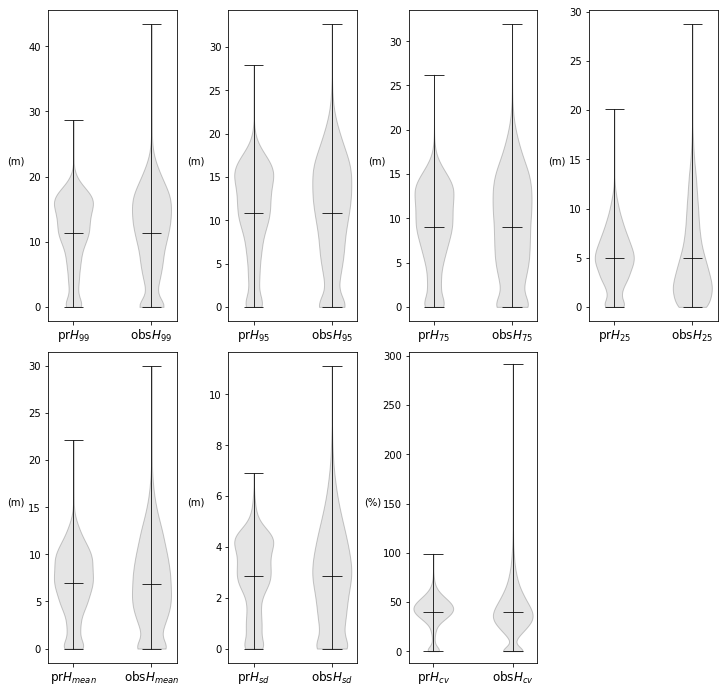

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

# fake data
fs = 10  # fontsize
#pos = [1, 2]
#data = ndf2[['pr_h95', 'ob_h95', ]].values

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 12))
#violin_parts = axes.violinplot(data, pos,  widths=0.5, showmeans=True,showextrema=True, showmedians=False, bw_method=0.2)

#axes[0, 1].violinplot(data, pos,  widths=0.5,showmeans=True, showextrema=True, showmedians=False,bw_method='silverman')
#axes[0, 1].set_title('Custom violinplot 2', fontsize=fs)

##################################################################
data99 = ndf2[['pr_h99', 'ob_h99',]].values

pos   = [1, 2,] 

label = ['pr$H_{99}$', 'obs$H_{99}$',] # 'pr$H_{75}$', 'obs$H_{75}$', 'pr$H_{25}$', 
         #'obs$H_{25}$','pr$H_{mean}$', 'obs$H_{mean}$']
axes[0, 0].set_xticks(pos)
axes[0, 0].set_xticklabels(label,fontsize=12)

"""ypos = [0,10,20,30,40]
ylabels = [0,10,20,30,40]
axes[0, 0].set_yticks(ypos)
axes[0, 0].set_yticklabels(ylabels,fontsize=10)"""
axes[0, 0].set_ylabel('(m)',fontsize=10,rotation=0)
axes[0, 0].yaxis.set_label_coords(-0.25,0.5)

violin_parts99 = axes[0, 0].violinplot(data99, pos,  widths=0.5, showmeans=True,showextrema=True, showmedians=False,
                                       bw_method=0.2)

# Make all the violin statistics marks black:
for partname in ('cbars','cmins','cmaxes','cmeans'): #'cbars','cmins','cmaxes',
    
    vp = violin_parts99[partname]
    vp.set_edgecolor('k')
    vp.set_linewidth(0.8)

# Make the violin body blue with a red border:
for vp in violin_parts99['bodies']:
    vp.set_facecolor("grey")
    vp.set_edgecolor('k')
    vp.set_linewidth(1)
    vp.set_alpha(0.2)


##################################################################
data95 = ndf2[['pr_h95', 'ob_h95', ]].values

pos   = [1, 2] 
label = ['pr$H_{95}$', 'obs$H_{95}$',] 

violin_parts95 = axes[0, 1].violinplot(data95, pos, points=500, widths=0.5, showmeans=True,
                                       showextrema=True, showmedians=False, bw_method=0.2)
#axes[0, 1].set_title('Custom violinplot 3', fontsize=fs)
axes[0, 1].set_ylabel('(m)',fontsize=10,rotation=0)
axes[0, 1].yaxis.set_label_coords(-0.25,0.5)
axes[0, 1].set_xticks(pos)
axes[0, 1].set_xticklabels(label,fontsize=12)

# Make all the violin statistics marks black:
for partname in ('cbars','cmins','cmaxes','cmeans'): #'cbars','cmins','cmaxes',
    
    vp = violin_parts95[partname]
    vp.set_edgecolor('k')
    vp.set_linewidth(0.8)

# Make the violin body blue with a red border:
for vp in violin_parts95['bodies']:
    vp.set_facecolor("grey")
    vp.set_edgecolor('k')
    vp.set_linewidth(1)
    vp.set_alpha(0.2)

##################################################################

data75 = ndf2[['pr_h75', 'ob_h75', ]].values

pos   = [1, 2] 
label = ['pr$H_{75}$', 'obs$H_{75}$',] 

violin_parts75 = axes[0, 2].violinplot(data75, pos, points=500, widths=0.5, showmeans=True,
                                       showextrema=True, showmedians=False,bw_method=0.2)
#axes[0, 1].set_title('Custom violinplot 3', fontsize=fs)
axes[0, 2].set_ylabel('(m)',fontsize=10,rotation=0)
axes[0, 2].yaxis.set_label_coords(-0.25,0.5)
axes[0, 2].set_xticks(pos)
axes[0, 2].set_xticklabels(label,fontsize=12)

# Make all the violin statistics marks black:
for partname in ('cbars','cmins','cmaxes','cmeans'): #'cbars','cmins','cmaxes',
    
    vp = violin_parts75[partname]
    vp.set_edgecolor('k')
    vp.set_linewidth(0.8)

# Make the violin body blue with a red border:
for vp in violin_parts75['bodies']:
    vp.set_facecolor("grey")
    vp.set_edgecolor('k')
    vp.set_linewidth(1)
    vp.set_alpha(0.2)

##################################################################


data25 = ndf2[['pr_h25', 'ob_h25', ]].values

pos   = [1, 2] 
label = ['pr$H_{25}$', 'obs$H_{25}$',] 

violin_parts25 = axes[0, 3].violinplot(data25, pos, points=500, widths=0.5, showmeans=True,
                                       showextrema=True, showmedians=False,bw_method=0.2)
#axes[0, 1].set_title('Custom violinplot 3', fontsize=fs)
axes[0, 3].set_ylabel('(m)',fontsize=10,rotation=0)
axes[0, 3].yaxis.set_label_coords(-0.25,0.5)
axes[0, 3].set_xticks(pos)
axes[0, 3].set_xticklabels(label,fontsize=12)

# Make all the violin statistics marks black:
for partname in ('cbars','cmins','cmaxes','cmeans'): #'cbars','cmins','cmaxes',
    
    vp = violin_parts25[partname]
    vp.set_edgecolor('k')
    vp.set_linewidth(0.8)

# Make the violin body blue with a red border:
for vp in violin_parts25['bodies']:
    vp.set_facecolor("grey")
    vp.set_edgecolor('k')
    vp.set_linewidth(1)
    vp.set_alpha(0.2)

##################################################################

datahm = ndf2[['pr_hmc', 'ob_hmc', ]].values

pos   = [1, 2] 
label = ['pr$H_{mean}$', 'obs$H_{mean}$',] 

violin_partshm = axes[1, 0].violinplot(datahm, pos, points=500, widths=0.5, showmeans=True,
                                       showextrema=True, showmedians=False,bw_method=0.2)
#axes[0, 1].set_title('Custom violinplot 3', fontsize=fs)
axes[1, 0].set_ylabel('(m)',fontsize=10,rotation=0)
axes[1, 0].yaxis.set_label_coords(-0.25,0.5)
axes[1, 0].set_xticks(pos)
axes[1, 0].set_xticklabels(label,fontsize=12)

# Make all the violin statistics marks black:
for partname in ('cbars','cmins','cmaxes','cmeans'): #'cbars','cmins','cmaxes',
    
    vp = violin_partshm[partname]
    vp.set_edgecolor('k')
    vp.set_linewidth(0.8)

# Make the violin body blue with a red border:
for vp in violin_partshm['bodies']:
    vp.set_facecolor("grey")
    vp.set_edgecolor('k')
    vp.set_linewidth(1)
    vp.set_alpha(0.2)

##################################################################

datasd = ndf2[['pr_hsd', 'ob_hsd', ]].values

pos   = [1, 2] 
label = ['pr$H_{sd}$', 'obs$H_{sd}$',] 

violin_partssd = axes[1, 1].violinplot(datasd, pos, points=500, widths=0.5, showmeans=True,
                                       showextrema=True, showmedians=False,bw_method=0.2)
#axes[0, 1].set_title('Custom violinplot 3', fontsize=fs)
axes[1, 1].set_ylabel('(m)',fontsize=10,rotation=0)
axes[1, 1].yaxis.set_label_coords(-0.25,0.5)
axes[1, 1].set_xticks(pos)
axes[1, 1].set_xticklabels(label,fontsize=12)

# Make all the violin statistics marks black:
for partname in ('cbars','cmins','cmaxes','cmeans'): #'cbars','cmins','cmaxes',
    
    vp = violin_partssd[partname]
    vp.set_edgecolor('k')
    vp.set_linewidth(0.8)

# Make the violin body blue with a red border:
for vp in violin_partssd['bodies']:
    vp.set_facecolor("grey")
    vp.set_edgecolor('k')
    vp.set_linewidth(1)
    vp.set_alpha(0.2)

##################################################################

datacv = ndf2[['pr_hcv', 'ob_hcv', ]].values

pos   = [1, 2] 
label = ['pr$H_{cv}$', 'obs$H_{cv}$',] 

violin_partscv = axes[1, 2].violinplot(datacv, pos, points=500, widths=0.5, showmeans=True,
                                       showextrema=True, showmedians=False,bw_method=0.2)
#axes[0, 1].set_title('Custom violinplot 3', fontsize=fs)
axes[1, 2].set_ylabel('(%)',fontsize=10,rotation=0)
axes[1, 2].yaxis.set_label_coords(-0.28,0.5)
axes[1, 2].set_xticks(pos)
axes[1, 2].set_xticklabels(label,fontsize=12)

# Make all the violin statistics marks black:
for partname in ('cbars','cmins','cmaxes','cmeans'): #'cbars','cmins','cmaxes',
    
    vp = violin_partscv[partname]
    vp.set_edgecolor('k')
    vp.set_linewidth(0.8)

# Make the violin body blue with a red border:
for vp in violin_partscv['bodies']:
    vp.set_facecolor("grey")
    vp.set_edgecolor('k')
    vp.set_linewidth(1)
    vp.set_alpha(0.2)

##################################################################
#for ax in axes.flatten():
    #ax.set_yticklabels([])

fig.delaxes(axes[1][3])    
    
plt.margins(x=0.04)
plt.margins(y=0.04)
    
#fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.1)
fig.subplots_adjust(wspace = 0.4)
plt.show()
fig.savefig('PO_s2_10m_val01_violin_all.pdf',dpi=600)

In [ ]:
# Create violin plot objects:
data2 = ndf2[['pr_h99', 'ob_h99', 'pr_h95', 'ob_h95', 'pr_h75', 'ob_h75', 'pr_h25', 'ob_h25', 'pr_hmc', 'ob_hmc',]].values


fig, ax = plt.subplots(1, 1, figsize = (30,10))
violin_parts = ax.violinplot(data2, widths = 0.5, showmeans = True, showextrema = True, showmedians = False,bw_method=0.3)

# set up the x axis labels
pos   = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
label = ['pr$H_{99}$', 'obs$H_{99}$','pr$H_{95}$', 'obs$H_{95}$', 'pr$H_{75}$', 'obs$H_{75}$', 'pr$H_{25}$', 
         'obs$H_{25}$','pr$H_{mean}$', 'obs$H_{mean}$']
ax.set_xticks(pos)
ax.set_xticklabels(label,fontsize=30)

ypos = [0,10,20,30,40]
ylabels = [0,10,20,30,40]
ax.set_yticks(ypos)
ax.set_yticklabels(ylabels,fontsize=26)
plt.ylabel('(m)',fontsize=30,rotation=0)
ax.yaxis.set_label_coords(-0.04,0.5)

# Make all the violin statistics marks black:
for partname in ('cbars','cmins','cmaxes','cmeans'): #'cbars','cmins','cmaxes',
    
    vp = violin_parts[partname]
    vp.set_edgecolor('k')
    vp.set_linewidth(0.8)

# Make the violin body blue with a red border:
for vp in violin_parts['bodies']:
    vp.set_facecolor("grey")
    vp.set_edgecolor('k')
    vp.set_linewidth(1)
    vp.set_alpha(0.2)

# define the space in the margins at the start and finish of the plot    
plt.margins(x=0.01)
plt.margins(y=0.01)

# plot title
fig.suptitle('Sentinel-2 10m (Val01)', fontsize=30)

plt.savefig('PO_s2_10m_val01_violin.pdf',dpi=600)

In [3]:
plt.text(0.5, 1.08, figure_title,
         horizontalalignment='center',
         fontsize=20,
         transform = ax2.transAxes)

NameError: name 'figure_title' is not defined

In [ ]:
# Create violin plot objects:
data2 = ndf2[['pr_hsd', 'ob_hsd']].values


fig, ax = plt.subplots(1, 1, figsize = (9,9))
violin_parts = ax.violinplot(data2, widths = 0.5, showmeans = True, showextrema = True, showmedians = False)

# set up the x axis labels
pos   = [1, 2,]
label = ['pr$H_{sd}$', 'obs$H_{sd}$']
ax.set_xticks(pos)
ax.set_xticklabels(label,fontsize=26)

# y axis has been checked
ypos = [2,4,6,8,10]
ylabels = [2,4, 6, 8,10]
ax.set_yticks(ypos)
ax.set_yticklabels(ylabels,fontsize=20)
plt.ylabel('(m)',fontsize=26, rotation=0)
ax.yaxis.set_label_coords(-0.09,0.5)

# Make all the violin statistics marks black:
for partname in ('cbars','cmins','cmaxes','cmeans'): #'cbars','cmins','cmaxes',
    
    vp = violin_parts[partname]
    vp.set_edgecolor('k')
    vp.set_linewidth(0.8)

# Make the violin body blue with a red border:
for vp in violin_parts['bodies']:
    vp.set_facecolor("grey")
    vp.set_edgecolor('k')
    vp.set_linewidth(1)
    vp.set_alpha(0.2)

# define the space in the margins at the start and finish of the plot    
plt.margins(x=0.03)
plt.margins(y=0.03)

# plot title
#fig.suptitle('Landsat-8 30m (Val01)', fontsize=26)

plt.savefig('PO_s2_10m_val01_violin_hsd.pdf',dpi=600)

In [ ]:
# Create violin plot objects:
data2 = ndf2[['pr_hcv', 'ob_hcv']].values


fig, ax = plt.subplots(1, 1, figsize = (9,9))
violin_parts = ax.violinplot(data2, widths = 0.5, showmeans = True, showextrema = True, showmedians = False)

# set up the x axis labels
pos   = [1, 2,]
label = ['pr$H_{cov}$', 'obs$H_{cov}$']
ax.set_xticks(pos)
ax.set_xticklabels(label,fontsize=26)

# y axis has been checked
ypos = [0,100,200,300]
ylabels = [0,100,200,300]
ax.set_yticks(ypos)
ax.set_yticklabels(ylabels,fontsize=20)
plt.ylabel('(%)',fontsize=26,rotation=0)
ax.yaxis.set_label_coords(-0.12,0.5)

# Make all the violin statistics marks black:
for partname in ('cbars','cmins','cmaxes','cmeans'): #'cbars','cmins','cmaxes',
    
    vp = violin_parts[partname]
    vp.set_edgecolor('k')
    vp.set_linewidth(0.8)

# Make the violin body blue with a red border:
for vp in violin_parts['bodies']:
    vp.set_facecolor("grey")
    vp.set_edgecolor('k')
    vp.set_linewidth(1)
    vp.set_alpha(0.2)

# define the space in the margins at the start and finish of the plot    
plt.margins(x=0.03)
plt.margins(y=0.03)

# plot title
#fig.suptitle('Landsat-8 30m (Val01)', fontsize=26)

plt.savefig('PO_s2_10m_val01_violin_hcov.pdf',dpi=600)

In [ ]:
# Create violin plot objects:
data2 = ndf2[['pr_h95', 'ob_h95', ]].values #'pr_h95', 'ob_h95', 'pr_h75', 'ob_h75', 'pr_h25', 'ob_h25', 'pr_hmc', 'ob_hmc',]].values


fig, ax = plt.subplots(1, 1, figsize = (3,6))
violin_parts = ax.violinplot(data2, widths = 0.5, showmeans = True, showextrema = True, showmedians = False,bw_method=0.25)

# set up the x axis labels
pos   = [1, 2,] # 3, 4, 5, 6, 7, 8, 9, 10]
label = ['pr$H_{95}$', 'obs$H_{95}$',] # 'pr$H_{75}$', 'obs$H_{75}$', 'pr$H_{25}$', 
         #'obs$H_{25}$','pr$H_{mean}$', 'obs$H_{mean}$']
ax.set_xticks(pos)
ax.set_xticklabels(label,fontsize=15)

ypos = [0,10,20,30,40]
ylabels = [0,10,20,30,40]
ax.set_yticks(ypos)
ax.set_yticklabels(ylabels,fontsize=15)
plt.ylabel('(m)',fontsize=15,rotation=0)
ax.yaxis.set_label_coords(-0.2,0.5)

# Make all the violin statistics marks black:
for partname in ('cbars','cmins','cmaxes','cmeans'): #'cbars','cmins','cmaxes',
    
    vp = violin_parts[partname]
    vp.set_edgecolor('k')
    vp.set_linewidth(0.8)

# Make the violin body blue with a red border:
for vp in violin_parts['bodies']:
    vp.set_facecolor("grey")
    vp.set_edgecolor('k')
    vp.set_linewidth(1)
    vp.set_alpha(0.2)

# define the space in the margins at the start and finish of the plot    
plt.margins(x=0.01)
plt.margins(y=0.01)

# plot title
#fig.suptitle('Sentinel-2 10m (Val01)', fontsize=30)

plt.savefig('PO_s2_10m_val01_violin_h95.pdf',dpi=600)

In [ ]:
violinplot?

In [ ]:
subplots_adjust?